# Unit 2. A gentle introduction to audio applications

## Hands-on exercise

1. <strike>Create a Google Colab notebook.</strike>
1. Use 🤗 Datasets to load the train split of the [`facebook/voxpopuli`](facebook/voxpopuli) dataset in language of your choice in streaming mode.
1. Get the third example from the train part of the dataset and explore it. Given the features that this example has, what kinds of audio tasks can you use this dataset for?
1. Plot this example’s waveform and spectrogram.
1. Go to 🤗 Hub, explore pretrained models and find one that can be used for automatic speech recognition for the language that you have picked earlier. Instantiate a corresponding pipeline with the model you found, and transcribe the example.
1. Compare the transcription that you get from the pipeline to the transcription provided in the example.

NOTE: Due to t[his issue in 🤗 Datasets v2.19.0](https://github.com/huggingface/datasets/issues/6850), make sure you update and get at least v2.19.2.

----

In [1]:
from datasets import load_dataset

voxpopuli_en = load_dataset(
    "facebook/voxpopuli", 
    "en",
    split="train",
    streaming=True
)

/opt/conda/envs/foo/lib/python3.9/site-packages/datasets/load.py:1491: FutureWarning: The repository for facebook/voxpopuli contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/facebook/voxpopuli
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [2]:
_ = next(iter(voxpopuli_en))
_ = next(iter(voxpopuli_en))

example = next(iter(voxpopuli_en))

In [3]:
_ = [print(k) for k in example.keys()]

audio_id
language
audio
raw_text
normalized_text
gender
speaker_id
is_gold_transcript
accent


In [4]:
print(f"raw_text:\n  {example['raw_text']}")

raw_text:
  If you do not address this problem, the ground is there for populist nationalist forces to go on growing all over Europe.


In [5]:
print(f"normalized_text:\n  {example['normalized_text']}")

normalized_text:
  if you do not address this problem the ground is there for populist nationalist forces to go on growing all over europe.


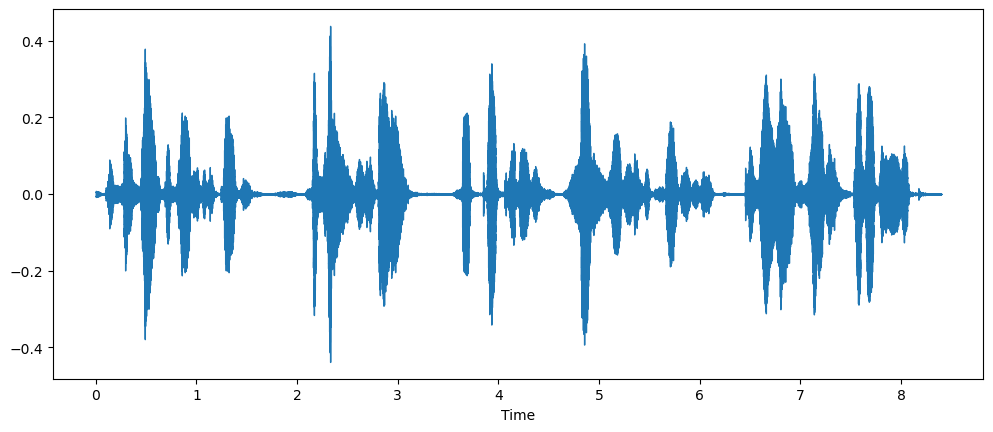

In [6]:
import librosa
import matplotlib.pyplot as plt
import librosa.display

example_ts = example["audio"]["array"]
example_sr = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(example_ts, sr=example_sr)

In [ ]:
import numpy as np

plt.figure().set_figwidth(12)
librosa.display.specshow(
    example_ts,
    x_axis="time",
    y_axis="mel",
    sr=example_sr,
    hop_length=feature_extractor.hop_length,
)
plt.colorbar()

In [ ]:
import torch
from transformers import pipeline

device = "cuda:0" if torch.cuda.is_available() else "cpu"

pipe = pipeline(
    task="automatic-speech-recognition",
    model="openai/whisper-small",
    chunk_length_s=30,
    device=device
)

In [ ]:
pipe(example_ts)["text"]